<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C2W4_Multiclass_Dropouts_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-12-23 08:44:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.13.80, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   284MB/s    in 0.7s    

2020-12-23 08:44:55 (284 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-12-23 08:44:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.115.128, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/r

In [3]:
import os,zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print(f'rock: {len(os.listdir(rock_dir))}, paper: {len(os.listdir(paper_dir))}, scissors: {len(os.listdir(scissors_dir))}')

rock: 840, paper: 840, scissors: 840


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/tmp/rps'
VALIDATION_DIR = '/tmp/rps-test-set'

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    target_size=(150,150),
    class_mode = 'categorical',
    batch_size=126
    )

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, 
    target_size=(150,150),
    class_mode = 'categorical',
    batch_size=126
    )

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(150,150, 3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.summary()


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

In [5]:
model.compile(optimizer=tf.optimizers.RMSprop(lr=1e-04), loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 27s 972ms/step - loss: 1.1157 - accuracy: 0.3508 - val_loss: 1.0438 - val_accuracy: 0.6022
Epoch 2/25
20/20 [==============================] - 19s 961ms/step - loss: 1.0512 - accuracy: 0.4584 - val_loss: 0.9802 - val_accuracy: 0.3414
Epoch 3/25
20/20 [==============================] - 19s 962ms/step - loss: 0.9771 - accuracy: 0.5184 - val_loss: 0.8109 - val_accuracy: 0.7984
Epoch 4/25
20/20 [==============================] - 19s 956ms/step - loss: 0.8979 - accuracy: 0.5917 - val_loss: 0.7334 - val_accuracy: 0.8360
Epoch 5/25
20/20 [==============================] - 19s 970ms/step - loss: 0.8249 - accuracy: 0.6406 - val_loss: 0.6022 - val_accuracy: 0.8710
Epoch 6/25
20/20 [==============================] - 19s 952ms/step - loss: 0.7482 - accuracy: 0.6756 - val_loss: 0.5486 - val_accuracy: 0.7876
Epoch 7/25
20/20 [==============================] - 19s 961ms/step - loss: 0.6674 - accuracy: 0.7522 - val_loss: 0.5958 - val_accuracy: 0.7177

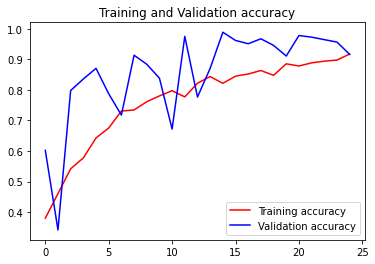

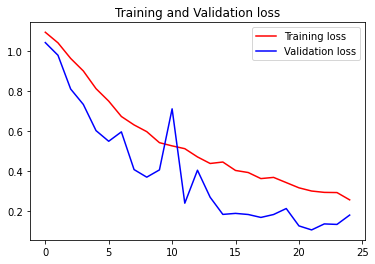

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()